In [1]:
from custom_functions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
####### Expanded Dimention

def userf1(t, x_arr, p):
    '''2D ODE system for the AMOC
    Input
    t  : float
        time value
    x  : array (2, N)
        state space values
    p  : array (2,)
        parameter values
    
    
    Returns
    xout: array, shape (2, N)
           Array containing derivative at x
           2nd dimension denotes derivatives for different points
    '''
    
    if x_arr.ndim == 1:
        x_arr = np.expand_dims(x_arr, axis=1)
    
    n = x_arr.shape
    xout = np.empty(n)
    xout[:] = np.nan 

    b = p[0,]
    g = p[1,]
    
    
    xout[0,:] = x_arr[0, :] - (x_arr[0, :]**2)*np.exp(-b*x_arr[0, :]*x_arr[1, :])
    xout[1,:] = x_arr[1, :] - (x_arr[1, :]**2)*np.exp(-g*x_arr[0, :])
    return xout

def userdf(x):
    h = 1e-06
    J = MyJacobian(userf, x, h)
    if J.ndim > 2:
        J = J.squeeze(axis=2)
    return J

# Finding Equalibrium Points

In [56]:
####### Nonexpanded Dimention

def f1(x_arr, b, g):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z

    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])



def df_for_f1(x):
    h = 1e-06
    J = MyJacobian(function_being_used, x, h)
    J = np.squeeze(J, axis = 2)
    return J
    
def grid_of_coords(max_x_val, increment):
    x=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))
    y=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))

    xx,yy=np.meshgrid(x,y)
    coords=np.array((xx.ravel(), yy.ravel())).T
    return coords

def bin_repeats(points, threshold):

    # Function to calculate the distance between two points
    def distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    # Create a mask for points to keep
    keep_mask = np.ones(len(points), dtype=bool)

    # Iterate through the points and filter based on the threshold
    for i in range(len(points)):
        if keep_mask[i]:
            for j in range(i + 1, len(points)):
                if distance(points[i], points[j]) < threshold:
                    keep_mask[j] = False

    # Use the mask to filter the points and create a 2D NumPy array
    return points[keep_mask] 

### Create Grid of points and then find where they converge

In [76]:

#comment out to save ti
def function_being_used(x0):
    b = 0.25
    g = -1
    return f1(x0, b, g)


x0 = np.array([0, 1.])
tol = 1e-8
maxit = 100

coords = grid_of_coords(10, 0.25)
eqlib_list = np.empty(shape=[0, 2])

for i in coords:
    x , converged , jacobian = MySolve(function_being_used, i, df_for_f1, tol, maxit)
    
    if converged:
        x = np.squeeze(x, axis = 1)
        eqlib_list = np.append(eqlib_list, np.array([x]), axis=0)

print(bin_repeats(eqlib_list, 1e-5))
equlib_list = bin_repeats(eqlib_list, 1e-5)



C:\Users\aaron\AppData\Local\Temp\ipykernel_35132\2395956410.py:6: RuntimeWarning: overflow encountered in exp
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
c:\Users\aaron\OneDrive\Documents\AAUni\Dynamical systems and chaos\Case Study\custom_functions.py:55: RuntimeWarning: invalid value encountered in subtract
  dfi = (f(xi1) - f(xi2)) / (2 * h)
c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


matrix is singular
matrix is singular


C:\Users\aaron\AppData\Local\Temp\ipykernel_35132\2395956410.py:7: RuntimeWarning: overflow encountered in exp
  dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])


matrix is singular
matrix is singular
matrix is singular


c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


matrix is singular
matrix is singular
matrix is singular


C:\Users\aaron\AppData\Local\Temp\ipykernel_35132\2395956410.py:6: RuntimeWarning: overflow encountered in multiply
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])


matrix is singular
[[ 0.00000000e+00 -1.15900605e-22]
 [-5.76721899e-44  1.00000000e+00]
 [ 1.00000000e+00 -1.11229388e-28]
 [ 1.09589684e+00  3.34239712e-01]]


In [60]:
print(equlib_list[3])
J = df_for_f1(equlib_list[3])
eig_val2 = linalg.eig(J)[0]
print(eig_val2)

[1.09589684 0.33423971]
[-0.95421347+0.31346168j -0.95421347-0.31346168j]


# Make this the only time you define b

In [61]:
b = 0.25

# Burfication Track up g

In [89]:
# Define RHS for tracking equilibria
RHS = lambda y: userf1(0,y[0:2,:],np.array([b, y[2,:]]))

h=1e-6
df= lambda y: np.squeeze(MyJacobian(RHS,y,h),axis=2)

# Define MyTrackCurve initial points, MAKE GUESS OF Y TANGENT
xeq1 = equlib_list[3]
#print(xeq1)
print(g)
y0 = np.append(xeq1,np.array([g]),axis=0)
print('y0', y0)
ytan0 = np.expand_dims(np.array([0.,0.,1.]),axis=1) # guess in the direction of increasing F

# Solve for the true initial tangent
df0 = df(y0)
zeros0 = np.zeros((2,))
zeros1 = np.append(zeros0,np.array([1.]),axis=0)
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult

print(ytan)

ylist1 = MyTrackCurve(RHS,df,y0,ytan,nmax=1000,stepsize=0.01)


#NOW OTHER DIRECTION
# guess in direction for decreasing F
ytan0 = np.expand_dims(np.array([0.,0.,-1.]),axis=1)

# Solve for the true initial tangent
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult

ylist2 = MyTrackCurve(RHS,df,y0,ytan,nmax=1000,stepsize=0.01)

###Concatenate
ylist = np.concatenate((np.flip(ylist2,1),ylist1),axis=1)
#ylist = ylist1.copy()

[1.09589684 0.33423971]
-1
y0 [ 1.09589684  0.33423971 -1.        ]
[0.10298346 0.31158612 0.94462082]


C:\Users\aaron\AppData\Local\Temp\ipykernel_35132\725768171.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  RHS = lambda y: userf1(0,y[0:2,:],np.array([b, y[2,:]]))


### PlOtTiNg

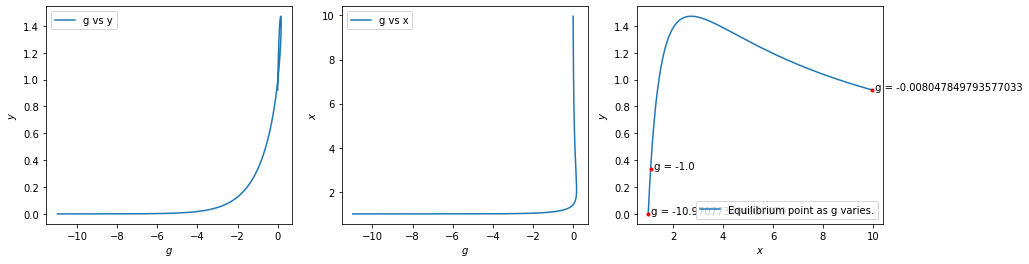

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

ax1 = axs[0]
ax1.plot(ylist[2,:],ylist[1,:], label = 'g vs y')
ax1.set_xlabel("$g$")
ax1.set_ylabel("$y$")
ax1.legend()
ax1.set_title("")

ax2 = axs[1]
ax2.plot(ylist[2,:], ylist[0,:], label = 'g vs x')
ax2.set_xlabel("$g$")
ax2.set_ylabel("$x$")
ax2.legend()
ax2.set_title("")

ax3 = axs[2]
length = ylist.shape[1] # The number of points in ylist
ax3.plot(ylist[0,:], ylist[1,:], label = 'Equilibrium point as g varies.')
label = ' g = ' + str(ylist[2,0])
ax3.plot(ylist[0,0], ylist[1,0], '.', color = 'r')
ax3.text(ylist[0,0], ylist[1,0],label)

label = ' g = ' + str(ylist[2,int(length/2)])
ax3.plot(ylist[0,int(length/2)], ylist[1,int(length/2)], '.', color = 'r' )
ax3.text(ylist[0,int(length/2)], ylist[1,int(length/2)],label)

label = ' g = ' + str(ylist[2,length-1])
ax3.plot(ylist[0,int(length-1)], ylist[1,int(length-1)], '.', color = 'r' )
ax3.text(ylist[0,int(length-1)], ylist[1,int(length-1)],label)

ax3.set_xlabel("$x$")
ax3.set_ylabel("$y$")
ax3.legend()
ax3.set_title("")



plt.show()

## Stability

In [91]:
#Finding the eigen values (eig_val), and stability (stab) at at value of g
stab = np.empty((ylist.shape[1],1))*np.nan
#note that the number of eigen values at each point of g will be ylist's (=[x,z,g])  width-1
eig_val = np.empty((ylist.shape[1],ylist.shape[0]-1),dtype=np.csingle)*np.nan

print('should be same',ylist1[0:2,0], xeq1)

#J = MyJacobian(lambda x:userf1(0,x,p_i),ylist[0:2,i],h)
#eig_val[i,:] = linalg.eig(J[:,:,0])[0]

for i in np.arange(0,ylist.shape[1]):
    p_i =np.array([b, ylist[2,i]])
    J = MyJacobian(lambda x:userf1(0,x,p_i),ylist[0:2,i],h)
    eig_val[i,:] = linalg.eig(J[:,:,0])[0]
    max_eig = max(np.real(eig_val[i,:]))
    stab[i] = max_eig > 0
    if (i>0 and stab[i] != stab[i-1] and stab[i-1] != 10):
        #print(max_eig)
        stab[i] = 10




should be same [1.09589684 0.33423971] [1.09589684 0.33423971]


In [92]:
for i in eig_val:
    print(i)

[-0.99999785+0.00686763j -0.99999785-0.00686763j]
[-0.99999785+0.00689891j -0.99999785-0.00689891j]
[-0.9999978+0.00693033j -0.9999978-0.00693033j]
[-0.9999978+0.00696188j -0.9999978-0.00696188j]
[-0.9999978+0.00699358j -0.9999978-0.00699358j]
[-0.99999774+0.00702542j -0.99999774-0.00702542j]
[-0.99999774+0.0070574j -0.99999774-0.0070574j]
[-0.9999977+0.00708952j -0.9999977-0.00708952j]
[-0.9999977+0.00712179j -0.9999977-0.00712179j]
[-0.9999977+0.0071542j -0.9999977-0.0071542j]
[-0.9999976+0.00718675j -0.9999976-0.00718675j]
[-0.9999976+0.00721945j -0.9999976-0.00721945j]
[-0.99999756+0.0072523j -0.99999756-0.0072523j]
[-0.99999756+0.00728529j -0.99999756-0.00728529j]
[-0.99999756+0.00731843j -0.99999756-0.00731843j]
[-0.9999975+0.00735171j -0.9999975-0.00735171j]
[-0.9999975+0.00738515j -0.9999975-0.00738515j]
[-0.99999744+0.00741873j -0.99999744-0.00741873j]
[-0.99999744+0.00745246j -0.99999744-0.00745246j]
[-0.9999974+0.00748634j -0.9999974-0.00748634j]
[-0.9999974+0.00752038j -0.9

### Equlb point goes from stable node to a saddle 

In [65]:
ind = np.where(stab==10)[0]
print(ind)
print(ylist[2,ind])
print(eig_val[ind-10])
print(eig_val[ind+10])


[1212]
[0.16469876]
[[-0.06104419+0.j -1.2430104 +0.j]]
[[ 0.05720207+0.j -1.2686547 +0.j]]


2.102209800770781 1.4137296425378263 0.1646987606080023
[[-0.99999785+0.00686763j -0.99999785-0.00686763j]
 [-0.99999785+0.00689891j -0.99999785-0.00689891j]
 [-0.9999978 +0.00693033j -0.9999978 -0.00693033j]
 ...
 [ 1.2846493 +0.j         -0.06829639+0.j        ]
 [ 1.2844733 +0.j         -0.06771947+0.j        ]
 [ 1.2842969 +0.j         -0.06714241+0.j        ]]


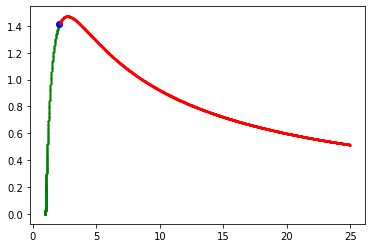

In [66]:
for i in np.arange(0,ylist.shape[1]):
    if stab[i] == False:
        plt.plot(ylist[0,i],ylist[1,i],'g.',markersize=2,label = 'stable eq')
    elif stab[i] == True:
        plt.plot(ylist[0,i],ylist[1,i],'r.',markersize=2,label = 'unstable eq')
    elif stab[i] == 10:
        plt.plot(ylist[0,i],ylist[1,i],marker='o',color='b',markersize=6,label='SN')
        print(ylist[0,i],ylist[1,i], ylist[2,i])
        #print(eig_val[i])
        
    else:
        print('Error - undefined stability type at i = ', i)

print(eig_val)

## Note: from a stable focus to stable node the stability doesn't change

# 2D param Bif Tracking

In [67]:
#Define functions
def df_2param(y):
    J = MyJacobian(lambda x:userf1(0,x,np.array([y[3],y[2]])),y[0:2],h)
    J = np.squeeze(J,axis=2)
    return J

######### Fold Bif ############

RHS_fold = lambda y: np.append(userf1(0,y[0:2,:],np.array([y[3,:],y[2,:]])),
                               np.expand_dims(np.array([linalg.det(df_2param(y))]),axis=1),axis=0)

df_fold= lambda y: np.squeeze(MyJacobian(RHS_fold,y,h),axis=2)

######### Hopf Bif ############

RHS_hopf = lambda y: np.append(userf1(0,y[0:2,:],np.array([y[3,:],y[2,:]])),
                               np.expand_dims(np.array([np.trace(df_2param(y))]),axis=1),axis=0)

df_hopf= lambda y: np.squeeze(MyJacobian(RHS_hopf,y,h),axis=2)

In [73]:
#RHS_used and df_used is either RHS_fold or RHS_hopf
RHS_used = RHS_fold
df_used = df_fold


# Define MyTrackCurve initial points

f_inds = np.where(stab == 10)[0]
print(f_inds)
y0 = np.array([ylist[0,f_inds[0]], ylist[1,f_inds[0]], ylist[2,f_inds[0]],  b])
print('y0', y0)

p_i =np.array([b, ylist[2,f_inds[0]]])
J = MyJacobian(lambda x:userf1(0,x,p_i),ylist[0:2,f_inds[0]],h)
eig_val = linalg.eig(J[:,:,0])[0]


ytan0 = np.expand_dims(np.array([0,1,0,1]),axis=1) # guess i the direction of increasing params

# Solve for the true initial tangent
df0 = np.squeeze(df_used(y0))
zeros0 = np.zeros((3,))
zeros1 = np.append(zeros0,np.array([1.]),axis=0)
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult
print('ytan', ytan)

yused1 = MyTrackCurve(RHS_used,df_used,y0,ytan,stepsize=0.01,nmax=200)

# guess in direction for decreasing params
ytan0 = np.expand_dims(np.array([0,-1,0,-1]),axis=1)

# Solve for the true initial tangent
f0 = np.concatenate((df0,np.transpose(ytan0)),axis=0)
z = np.linalg.lstsq(f0,zeros1,rcond=None)[0]
mult = np.sign(np.matmul(np.transpose(z),ytan0))
ytan = np.divide(z,linalg.norm(z))*mult

yused2 = MyTrackCurve(RHS_used,df_used,y0,ytan,stepsize=0.01,nmax=200)

[1212]
y0 [2.1022098  1.41372964 0.16469876 0.25      ]
ytan [-0.59882621  0.72958691  0.29240582 -0.15365205]


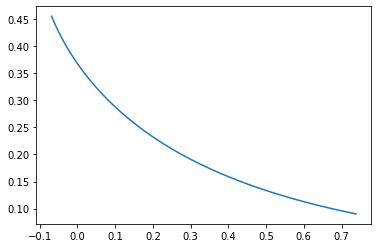

In [69]:
yused = np.concatenate((np.flip(yused2,1),yused1),axis=1)
#print(yused)
plt.plot(yused[2,:],yused[3,:], label = 'b vs g')